/var/folders/fc/fs9j8_5j73v0dccgsvwrdxmc0000gn/T/ipykernel_13617/4052619763.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


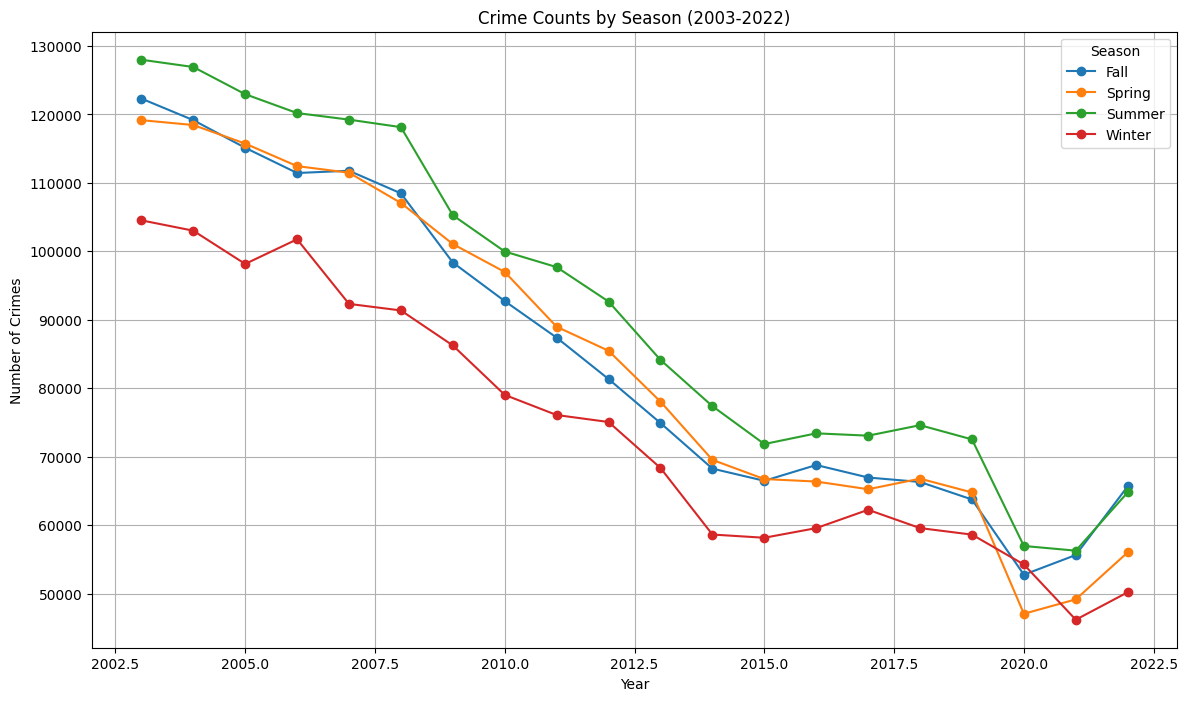

In [1]:
# 01_Crime_By_Season.ipynb

# --- Imports ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load the Cleaned Data ---
df = pd.read_csv('../data/CleanedCrime.csv')  # (Notice the path: up one folder)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# --- Filter to 2003-2022 ---
df = df[(df['Date'].dt.year >= 2003) & (df['Date'].dt.year <= 2022)]

# --- Create a Season Column ---
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Date'].apply(get_season)

# --- Group by Year and Season ---
seasonal_counts = df.groupby([df['Date'].dt.year, 'Season']).size().unstack(fill_value=0)

# --- Plot ---
seasonal_counts.plot(kind='line', figsize=(14,8), marker='o')
plt.title('Crime Counts by Season (2003-2022)')
plt.ylabel('Number of Crimes')
plt.xlabel('Year')
plt.grid(True)
plt.legend(title='Season')
plt.show()
